# Training Perceptron  -  Perceptron Trick 

## Perceptron in Deep Learning is basicaly a Like ( W0 + W1*X1 + ... Wn*Xn ) which tries to separate the data linearly

## $ W{\text{new}} = W{\text{old}} + \eta (Y{\text{j}} - Y{\text{pred}}) X{\text{j}} $


In [294]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
from sklearn.datasets import make_classification

In [296]:
X , Y = make_classification(n_samples = 100 , n_features = 2 , n_informative = 1 , n_redundant = 0 , n_classes = 2 , n_clusters_per_class = 1 , 
                            hypercube = False , random_state =  41 , class_sep = 10)
X.shape , Y.shape

((100, 2), (100,))

In [297]:
X[:5]

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163]])

[]

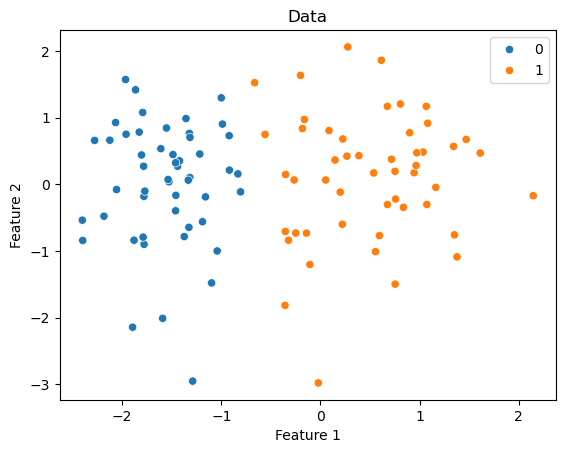

In [298]:
sns.scatterplot(x=X[:,0] , y=X[:,1] , hue = Y)
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.plot()

In [299]:
class perceptron:
    def __init__(self  , epochs=100 , lr=0.1):
        self.epochs = epochs
        self.lr = lr
        self.W = None

    def fit(self , X , Y):
        X = np.array(X) if not isinstance(X , np.ndarray) else X
        Y = np.array(Y) if not isinstance(Y , np.ndarray) else Y

        ones = np.ones(X.shape[0])
        X = np.insert(X , 0 , ones , axis=1)
        
        self.W = np.ones(X.shape[1])
        self.W[0] = 0

        for _ in range(self.epochs):
            
            k = np.random.randint(0,X.shape[0])
            predicted = (np.dot(self.W , X[k])) > 0
            self.W = self.W + self.lr*(Y[k] - predicted)*X[k]

    def predict(self , X):

        X = np.array(X) if not isinstance(X , np.ndarray) else X
        if X.ndim == 1:
            X = X.reshape(1,-1)
      
        ones = np.ones(X.shape[0])
        X = np.insert(X , 0 , ones , axis=1)
        
        return (np.dot(self.W , X.T) > 0).astype(int)
        

In [300]:
obj = perceptron()

In [301]:
obj.fit(X,Y)

In [302]:
obj.predict(np.array((-0.24882029, -0.73115232)))

array([1])

In [303]:
obj.predict(X)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [304]:
obj.W

array([0.6       , 0.89333468, 0.00289478])

In [305]:
slope = - obj.W[1] / obj.W[2]
intercept = - obj.W[0] / obj.W[2]
slope , intercept

(-308.6020467054769, -207.26971910102012)

In [306]:
X_input = np.linspace(-3,3,100)
Y_input = slope * X_input + intercept

(-3.0, 2.0)

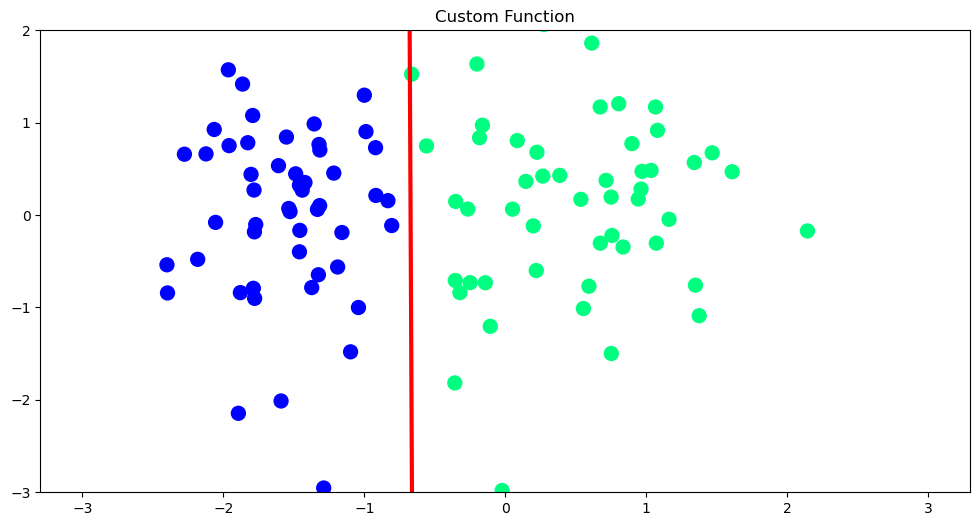

In [307]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0] , X[:,1] , c=Y  , cmap = 'winter' ,s=100)
plt.plot(X_input , Y_input , color = 'red' , linewidth = 3)
plt.title('Custom Function')
plt.ylim(-3,2)